In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df=pd.read_excel(r'ENB2012_data.xlsx')

In [9]:
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [16]:
df.isnull().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

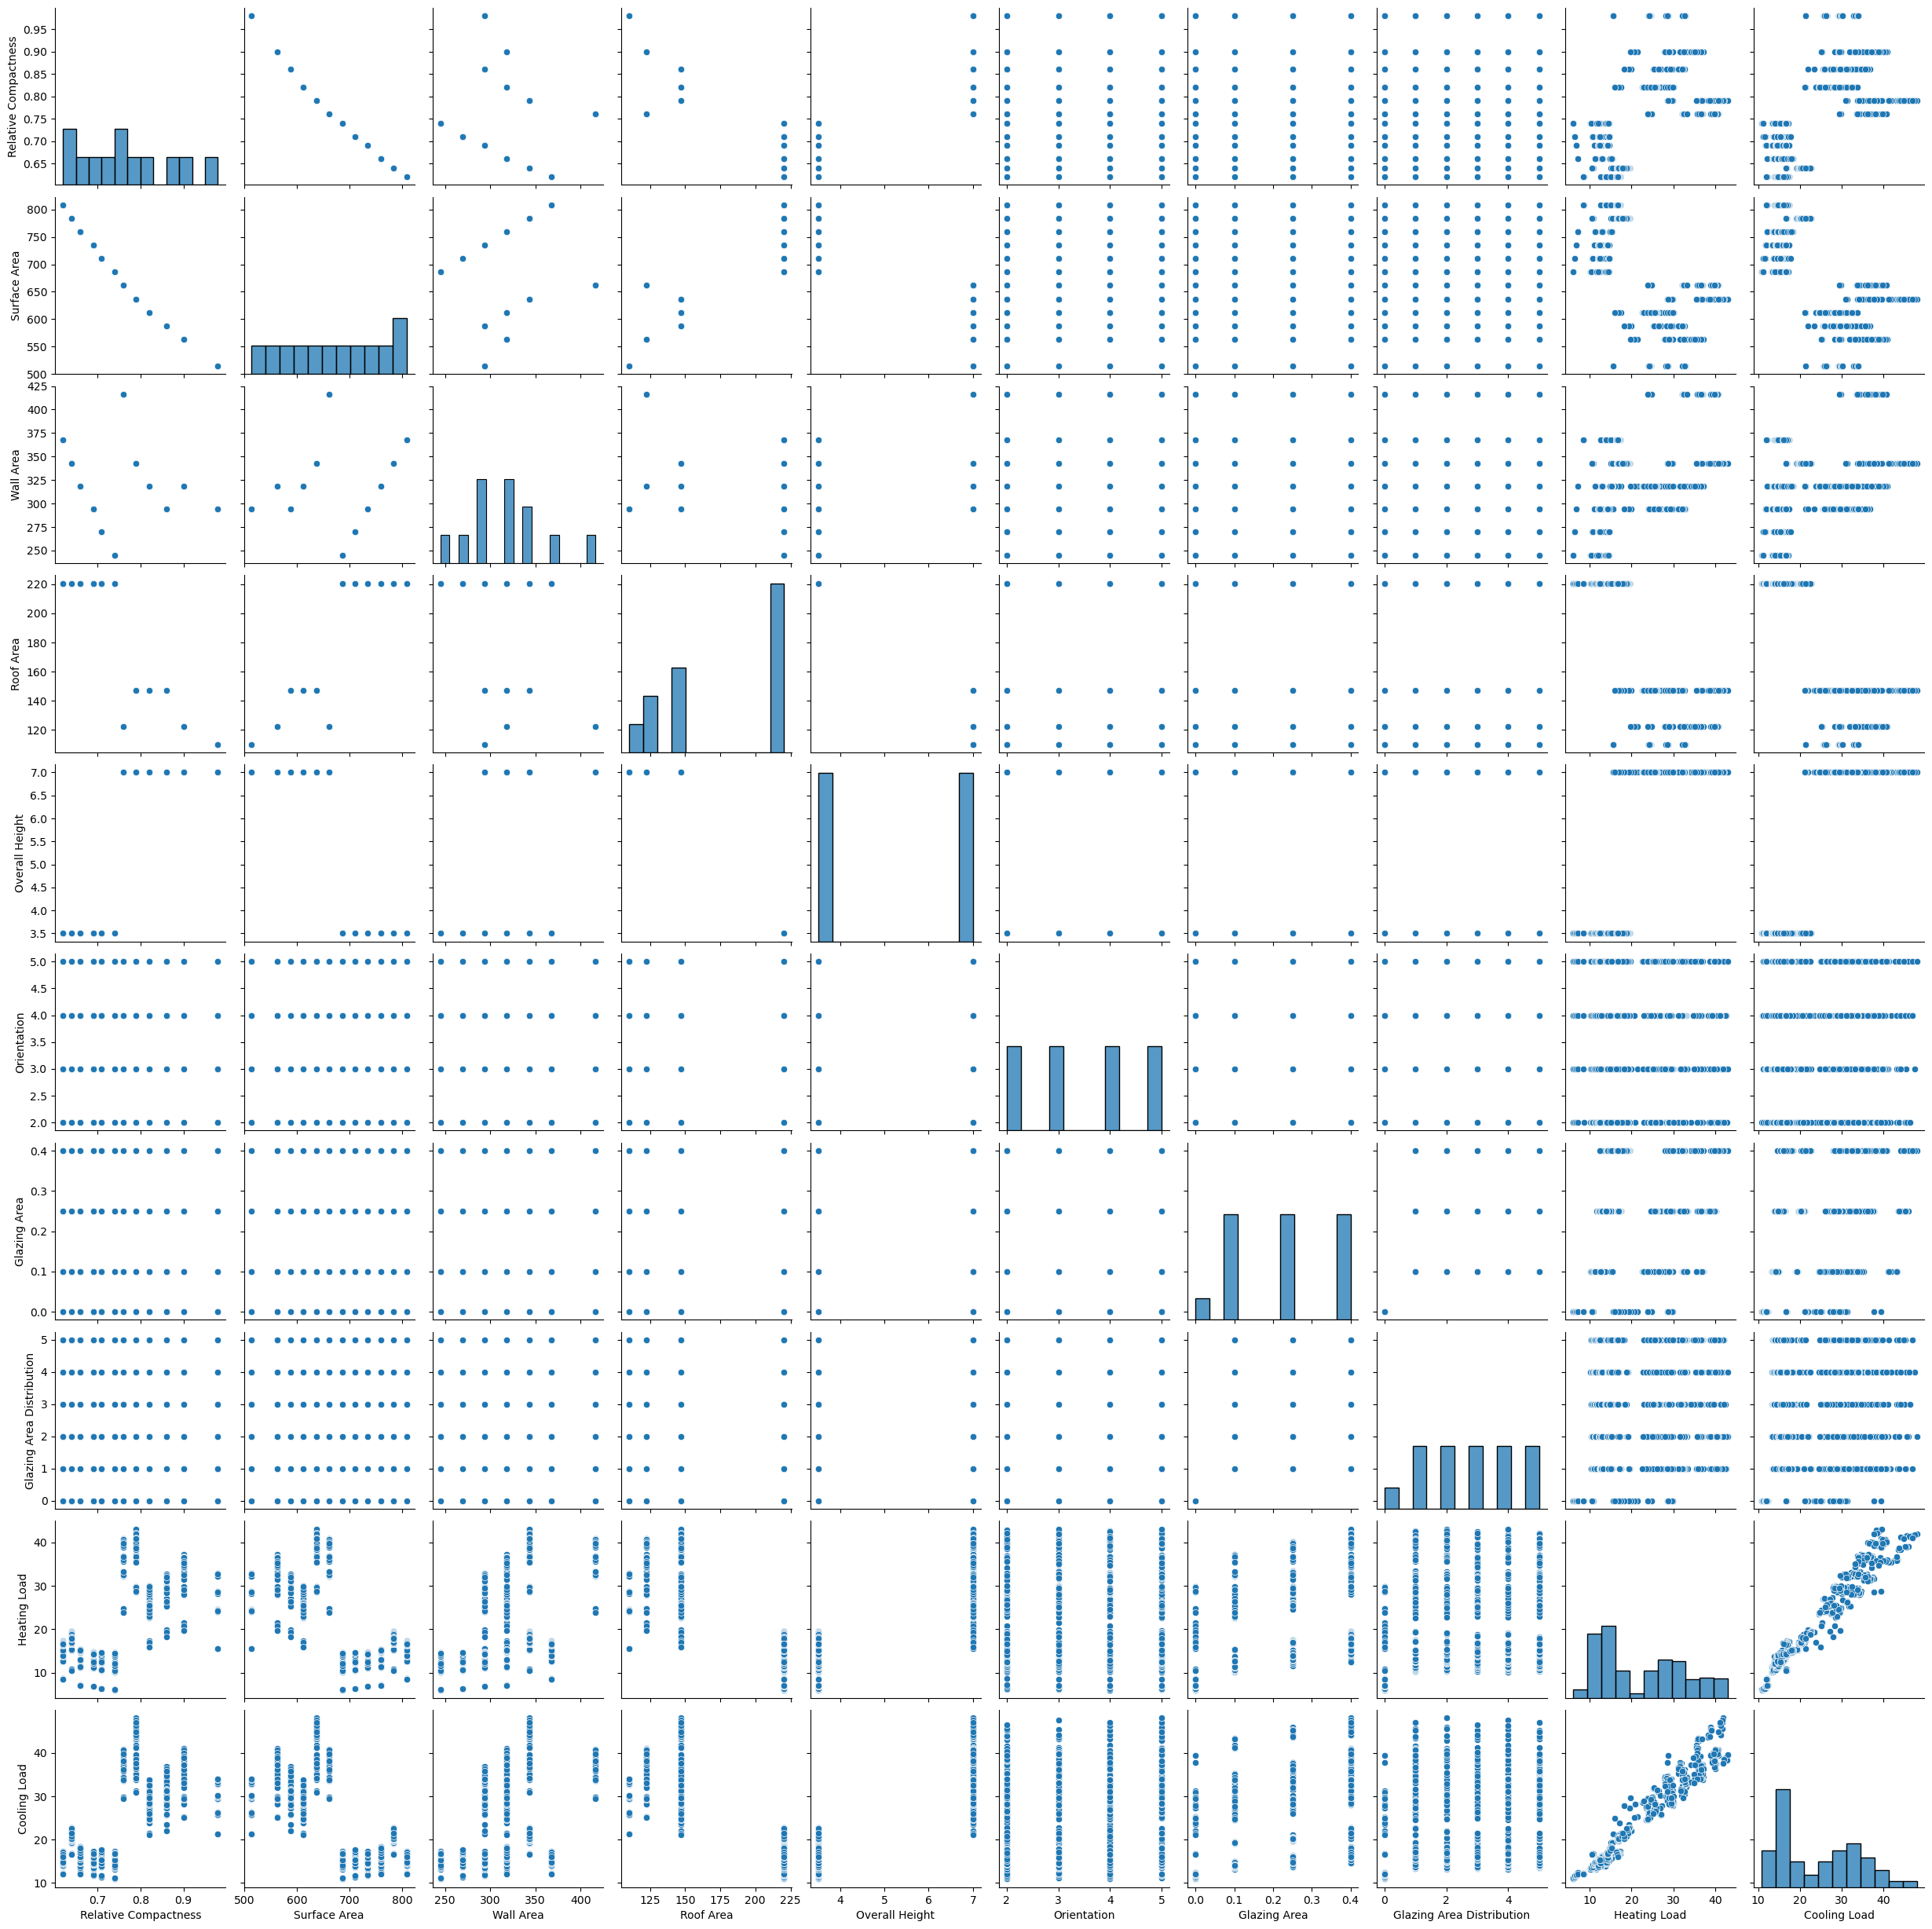

In [11]:
sns.pairplot(df)
plt.show()



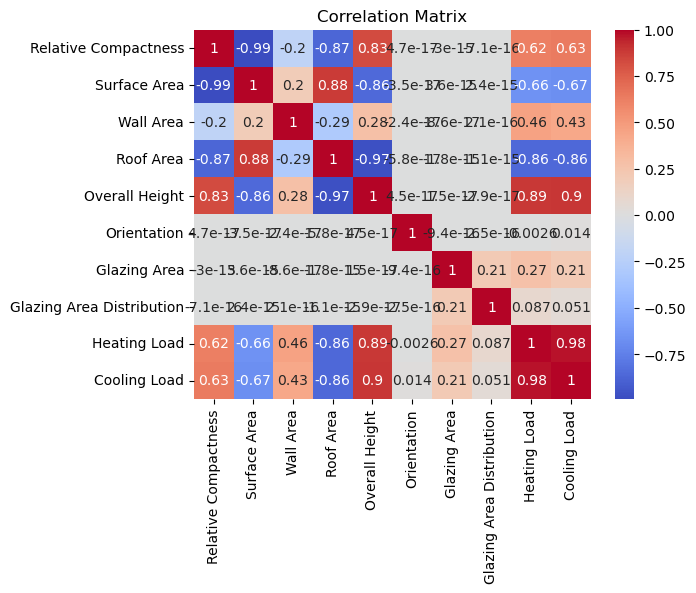

In [12]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score

In [34]:
X = df.iloc[:, :-2]  # all input features
y = df[['Heating Load', 'Cooling Load']]  # two targets
#y_heat = y['Heating Load']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [37]:
print('r^2:', r2_score(y_test, y_pred_lr))
accuracy = mean_squared_error(y_test, y_pred_lr)
print('RMSE:',accuracy)

r^2: 0.9025405965389908
RMSE: 9.540636149453718


In [36]:
print('r^2:', r2_score(y_test, y_pred_rf))
accuracy = mean_squared_error(y_test, y_pred_rf)
print('RMSE:',accuracy)

r^2: 0.9795467404443085
RMSE: 1.9092067296103912


For Classification Algorithm

In [38]:
def heat_class(value):
    if value < 15:
        return 0  # Low
    elif value < 30:
        return 1  # Medium
    else:
        return 2  # High

def cool_class(value):
    if value < 15:
        return 0  # Low
    elif value < 30:
        return 1  # Medium
    else:
        return 2  # High
        
df['Heating_Class'] = df['Heating Load'].apply(heat_class)
df['Cooling_Class'] = df['Cooling Load'].apply(cool_class)


In [39]:
print(df['Heating_Class'].value_counts())
print(df['Cooling_Class'].value_counts())

Heating_Class
0    285
1    281
2    202
Name: count, dtype: int64
Cooling_Class
1    365
2    255
0    148
Name: count, dtype: int64


In [40]:
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load,Heating_Class,Cooling_Class
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,1,1
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,1,1
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,1,1
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,1,1
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,1,1


In [45]:
from sklearn.ensemble import RandomForestClassifier
X = df.iloc[:, :-4]
y = df[['Heating_Class', 'Cooling_Class']] 
y_heat = df['Heating_Class']
X_train, X_test, y_train, y_test = train_test_split(X, y_heat, test_size=0.2, random_state=42)

In [46]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred_rc = clf.predict(X_test)

In [47]:
print(classification_report(y_test, y_pred_rc))
accuracy = accuracy_score(y_test, y_pred_rc)
print('acurracy:',accuracy)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       0.98      1.00      0.99        56
           2       1.00      1.00      1.00        43

    accuracy                           0.99       154
   macro avg       0.99      0.99      0.99       154
weighted avg       0.99      0.99      0.99       154

acurracy: 0.9935064935064936


In [53]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVC(kernel='rbf', C=2, gamma='auto', random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print('acurracy:',accuracy)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        55
           1       0.90      0.82      0.86        56
           2       0.88      1.00      0.93        43

    accuracy                           0.90       154
   macro avg       0.90      0.91      0.90       154
weighted avg       0.90      0.90      0.90       154

acurracy: 0.9025974025974026


without data scaling

In [54]:

svm = SVC(kernel='rbf', C=2, gamma='auto', random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print('acurracy:',accuracy)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        55
           1       0.85      0.79      0.81        56
           2       0.81      0.81      0.81        43

    accuracy                           0.87       154
   macro avg       0.86      0.87      0.86       154
weighted avg       0.87      0.87      0.87       154

acurracy: 0.8701298701298701


For Multi-Target Classification

In [64]:
from sklearn.multioutput import MultiOutputClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier()
multi_clf = MultiOutputClassifier(clf)
multi_clf.fit(X_train, y_train)
y_pred_multi= multi_clf.predict(X_test)

In [66]:
y_pred_multi_df = pd.DataFrame(y_pred_multi, columns=['Heating_Class', 'Cooling_Class'])

print("Heating Class Report:")
print(classification_report(y_test['Heating_Class'], y_pred_multi_df['Heating_Class']))

# Evaluate Cooling_Class
print("Cooling Class Report:")
print(classification_report(y_test['Cooling_Class'], y_pred_multi_df['Cooling_Class']))

Heating Class Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       0.98      1.00      0.99        56
           2       1.00      1.00      1.00        43

    accuracy                           0.99       154
   macro avg       0.99      0.99      0.99       154
weighted avg       0.99      0.99      0.99       154

Cooling Class Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        30
           1       0.87      0.84      0.85        69
           2       0.86      0.93      0.89        55

    accuracy                           0.87       154
   macro avg       0.87      0.87      0.87       154
weighted avg       0.87      0.87      0.87       154

